In [29]:
import pandas as pd

In [30]:
df=pd.read_csv('C:\\Users\\CVR\\Downloads\\fashion-mnist_train.csv')

In [31]:
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

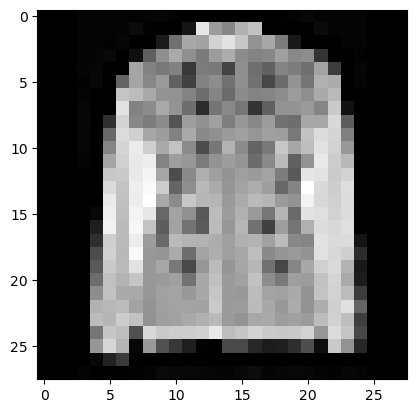

In [33]:
pixels=df.iloc[5,1:]
plt.imshow(np.array(pixels).reshape(28,28),cmap='grey')

In [34]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
X=df.drop(columns=['label'])
y=df['label']

In [35]:
X.shape

(60000, 784)

In [36]:
y.unique()

array([2, 9, 6, 0, 3, 4, 5, 8, 7, 1], dtype=int64)

In [37]:
X

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,5,0,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,1,2,0,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,0,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,0,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
sc=StandardScaler()
X_scaled=sc.fit_transform(X)

In [39]:
pca=PCA(n_components=2)
X_pca=pca.fit_transform(X_scaled)

In [40]:
X_pca

array([[ 10.66497292,  14.99336346],
       [-11.98974762,  11.81277013],
       [ 20.51767123,   1.57978434],
       ...,
       [  7.14876699,  -0.54356493],
       [  4.43415256,  20.8327043 ],
       [ -9.10680985,  14.83115377]])

In [41]:
y.value_counts()

label
2    6000
9    6000
6    6000
0    6000
3    6000
4    6000
5    6000
8    6000
7    6000
1    6000
Name: count, dtype: int64

In [42]:
from sklearn.manifold import TSNE
tsne=TSNE(n_components=2,perplexity=30,learning_rate=200,n_iter=1000,random_state=42,n_jobs=-1)
X_tsne=tsne.fit_transform(X_scaled)

df_tsne=pd.DataFrame(X_tsne,columns=['Dim1','Dim2'])
df_tsne['target']=y

C:\Users\CVR\anaconda3\Lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


In [44]:
df_tsne

,Dim1,Dim2,target
0,5.728398,27.535786,2
1,-37.994740,26.629463,9
2,36.159870,-1.250630,6
3,17.636047,-12.608580,0
4,20.671499,-39.607983,3
...,...,...,...
59995,-21.963133,39.226208,9
59996,-19.721062,-38.005840,1
59997,-7.160142,3.739906,8
59998,2.234034,24.334442,8


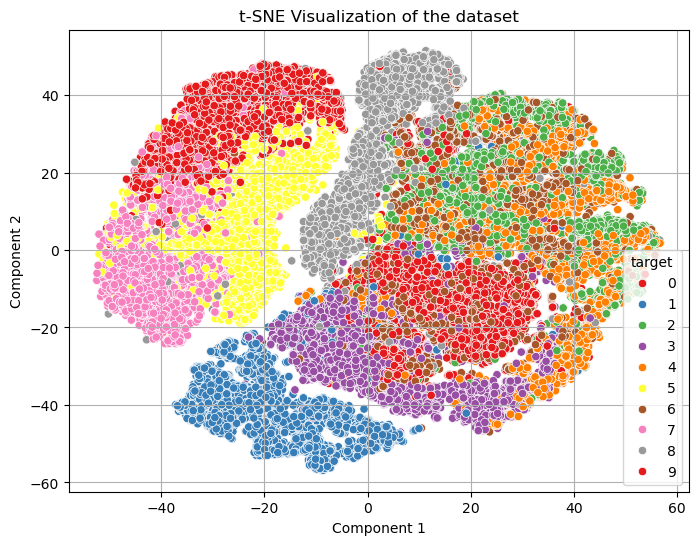

In [46]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_tsne,x='Dim1',y='Dim2',hue='target',palette='Set1')
plt.title('t-SNE Visualization of the dataset')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.grid(True)
plt.show()